# Week 9 - Multivariate Analysis, part 2

Multivariate Analysis with Cybersecurity Dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.preprocessing import OneHotEncoder
import os
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

In [3]:
ns = pd.read_csv('/Users/priya/VSCode/Python/Network Security/NetworkSecurity_Cleaned.csv')
pd.set_option('display.max_columns', None)
ns.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,IoC Detected,28.67,Alert Triggered,Malware,Known Pattern B,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,Alert Data,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,IoC Detected,51.50,Alert Triggered,Malware,Known Pattern A,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",39.123.165.122,Log Data,Alert Data,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,IoC Detected,87.42,Alert Triggered,DDoS,Known Pattern B,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,IoC Detected,15.79,Alert Triggered,Malware,Known Pattern B,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",39.123.165.122,Log Data,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,IoC Detected,0.52,Alert Triggered,DDoS,Known Pattern B,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,Log Data,Alert Data,Firewall


In [4]:
ns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      40000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         40000 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [5]:
# Get dummies and correlations of these columns

ns_copy = ns.copy()

ns_copy = ns_copy.drop(columns=['Source IP Address', 'Destination IP Address', 'Payload Data',
                                'User Information', 'Device Information', 'Malware Indicators', 
                                'Alerts/Warnings', 'Geo-location Data', 'Proxy Information',
                                'IDS/IPS Alerts', 'Firewall Logs'])

SourcePort = pd.get_dummies(ns_copy["Source Port"])
DestinationPort = pd.get_dummies(ns_copy["Destination Port"])
TrafficType = pd.get_dummies(ns_copy['Traffic Type'])
Protocol = pd.get_dummies(ns_copy["Protocol"])
PacketType = pd.get_dummies(ns_copy["Packet Type"])
AttackType = pd.get_dummies(ns_copy["Attack Type"])
AttackSignature = pd.get_dummies(ns_copy["Attack Signature"])
ActionTaken = pd.get_dummies(ns_copy["Action Taken"])
NetworkSegment = pd.get_dummies(ns_copy["Network Segment"])
LogSource = pd.get_dummies(ns_copy["Log Source"])

In [6]:
print(TrafficType.corr())

print(Protocol.corr())

print(PacketType.corr())

print(AttackType.corr())

print(AttackSignature.corr())

print(ActionTaken.corr())

print(NetworkSegment.corr())

print(LogSource.corr())

# Change the time variable to seconds

ns_copy['Timestamp'] = pd.to_datetime(ns_copy['Timestamp'])
ns_copy['time_since_starting'] = (ns_copy['Timestamp'] - ns_copy['Timestamp'].min()).dt.total_seconds()

# Merge all the modified features

encoded_cols = ['Source Port', 'Destination Port', 'Traffic Type', 'Protocol', 'Packet Type', 'Timestamp',
                'Attack Type', 'Attack Signature', 'Action Taken', 'Network Segment', 'Log Source']

ns_copy_encoded = ns_copy.drop(columns=encoded_cols)

for col in encoded_cols:
    dummies = pd.get_dummies(ns_copy[col], prefix=col.replace(' ', '_'))
    ns_copy_encoded = pd.concat([ns_copy_encoded, dummies], axis=1)

           DNS       FTP      HTTP
DNS   1.000000 -0.499247 -0.501952
FTP  -0.499247  1.000000 -0.498799
HTTP -0.501952 -0.498799  1.000000
          ICMP       TCP       UDP
ICMP  1.000000 -0.500960 -0.501723
TCP  -0.500960  1.000000 -0.497314
UDP  -0.501723 -0.497314  1.000000
         Control  Data
Control      1.0  -1.0
Data        -1.0   1.0
               DDoS  Intrusion   Malware
DDoS       1.000000  -0.500734 -0.501920
Intrusion -0.500734   1.000000 -0.497342
Malware   -0.501920  -0.497342  1.000000
                 Known Pattern A  Known Pattern B
Known Pattern A              1.0             -1.0
Known Pattern B             -1.0              1.0
          Blocked   Ignored    Logged
Blocked  1.000000 -0.503884 -0.501585
Ignored -0.503884  1.000000 -0.494515
Logged  -0.501585 -0.494515  1.000000
           Segment A  Segment B  Segment C
Segment A   1.000000  -0.497902  -0.500398
Segment B  -0.497902   1.000000  -0.501697
Segment C  -0.500398  -0.501697   1.000000
          Fir

In [7]:
# Mapping the Severity Levels (Low, Medium, High to 1, 2, 3)

level_map = {'Low': 1, 'Medium': 2, 'High': 3}
ns_copy_encoded['Severity Level'] = ns['Severity Level'].map(level_map)

/var/folders/nl/l6hswjjs70vcjbkfkcx2z0l80000gn/T/ipykernel_21774/241541699.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bubble_data = ns.groupby(['PacketBin', 'AnomalyBin']).size().reset_index(name='count')


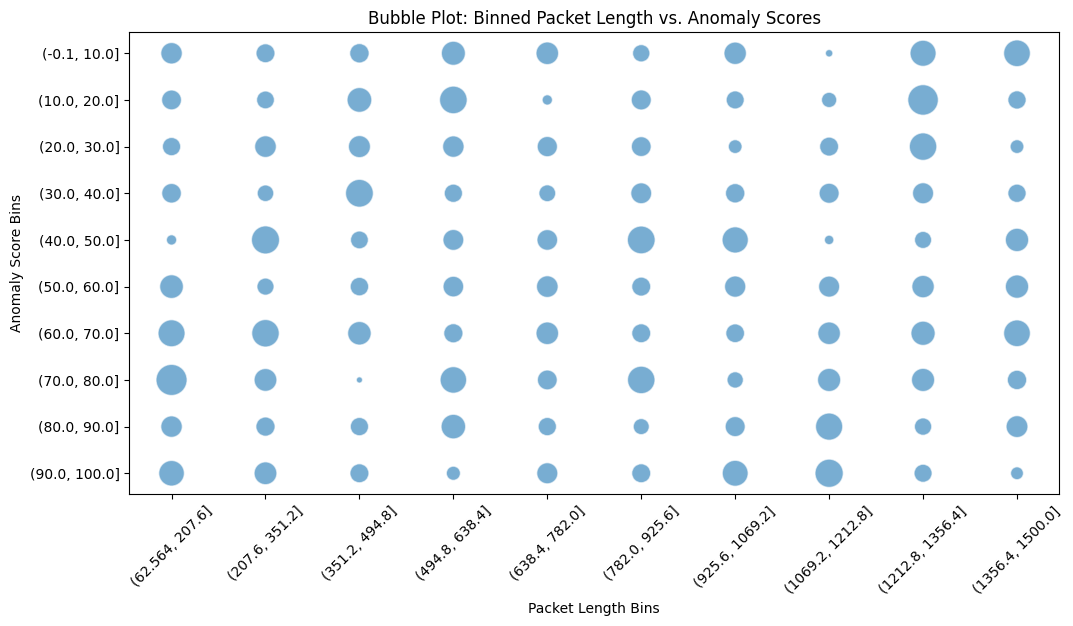

In [8]:
# Bubble Plot for Packet Length and Anomaly Scores

# Create bins

ns['PacketBin'] = pd.cut(ns['Packet Length'], bins=10)
ns['AnomalyBin'] = pd.cut(ns['Anomaly Scores'], bins=10)

bubble_data = ns.groupby(['PacketBin', 'AnomalyBin']).size().reset_index(name='count')

# Convert intervals to strings for plotting
bubble_data['PacketBin'] = bubble_data['PacketBin'].astype(str)
bubble_data['AnomalyBin'] = bubble_data['AnomalyBin'].astype(str)

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=bubble_data,
    x='PacketBin',
    y='AnomalyBin',
    size='count',
    sizes=(20, 500),
    legend=False,
    alpha=0.6
)
plt.xticks(rotation=45)
plt.title('Bubble Plot: Binned Packet Length vs. Anomaly Scores')
plt.xlabel('Packet Length Bins')
plt.ylabel('Anomaly Score Bins')
plt.show()


The bubble plot visualizes the relationship between binned packet lengths and anomaly scores in the dataset. Each bubble represents the count of records within a specific bin combination, with size indicating frequency. The distribution is dense and fairly uniform across bins, with no dominant clusters, suggesting that packet length and anomaly score are not strongly correlated in this synthetic dataset. This reinforces earlier findings that the dataset may lack clear feature separability tied to threat severity or behavior.

In [9]:
# PCA

low_freq_cols = ns_copy_encoded.columns[(ns_copy_encoded == 1).sum() < 5]
ns_reduced = ns_copy_encoded.drop(columns=low_freq_cols)

scaler = StandardScaler()
ns_encoded_scaled = scaler.fit_transform(
    ns_reduced.drop(columns=['PacketBin', 'AnomalyBin'], errors='ignore')
)

pca = PCA(n_components=15)
pca.fit(ns_encoded_scaled)

components5 = pca.components_

print(f"Print PCA Component 1: {components5[0]}")
print(f"Print PCA Component 2: {components5[1]}")
print(f"Print PCA Component 3: {components5[2]}")
print(f"Print PCA Component 4: {components5[3]}")
print(f"Print PCA Component 5: {components5[4]}")

print("\nExplained variance ratios:", pca.explained_variance_ratio_)
print("Total explained variance:", sum(pca.explained_variance_ratio_))

Print PCA Component 1: [ 9.95662409e-03  3.98770542e-03  1.66009019e-04  1.23125585e-02
 -4.99544938e-03  1.84845963e-02 -2.40445897e-03  7.36667942e-03
 -6.57595460e-03  4.21907692e-03  8.20142102e-03 -1.04305103e-02
  3.30627287e-03  9.30149150e-03 -2.58542184e-04  1.21872456e-03
 -1.59241819e-03 -5.00798345e-03  4.24944851e-03  6.78975987e-04
  8.36096589e-03 -9.81344552e-03 -1.32404100e-03 -8.48627733e-03
 -7.02720025e-03 -4.75861682e-04 -1.42969535e-03 -3.73233813e-04
 -1.19144199e-03 -1.55919342e-04 -5.74027457e-03  5.50195573e-04
  4.40349256e-03 -4.59127068e-03  6.28547693e-04  8.93611943e-03
 -2.78492801e-03 -7.12060914e-03  4.07916470e-03 -3.42718294e-03
  1.04350534e-03  5.87529066e-04 -4.70479311e-03  1.23768008e-03
 -1.44778955e-03 -1.24912336e-02 -2.36802694e-03 -2.31422113e-03
 -2.84439508e-03 -8.65395884e-03  3.58901424e-03  4.20492414e-03
  4.10284456e-03  5.98434889e-03  4.71846421e-03 -5.55639535e-04
 -1.49377804e-04  2.62475658e-02 -1.50682766e-03 -2.47512832e-02
  

In the PCA process, I removed extremely sparse one-hot encoded features that appeared in fewer than 5 records, as these would contribute little to overall variance and increase computational cost. We then scaled all numerical features using StandardScaler to ensure uniformity. PCA was applied with 15 components to extract the dominant patterns in the dataset. The first five components individually explained 1.9% to 2.6% of the total variance, with the first 15 together accounting for approximately 29.6%. This result is typical for high-dimensional encoded datasets, indicating that the data's variability is spread thinly across many features and no single component dominates.

# Week 4: Logistic Regression and Feature Scaling

In [10]:
# Logistic Regression

X = ns_reduced.drop(columns=['Severity Level', 'PacketBin', 'AnomalyBin'], errors='ignore')
y = ns_reduced['Severity Level']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42, test_size=0.2)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.328375

Classification Report:
               precision    recall  f1-score   support

           1       0.33      0.21      0.25      2673
           2       0.34      0.38      0.36      2729
           3       0.31      0.41      0.35      2598

    accuracy                           0.33      8000
   macro avg       0.33      0.33      0.32      8000
weighted avg       0.33      0.33      0.32      8000


Confusion Matrix:
 [[ 549  994 1130]
 [ 542 1025 1162]
 [ 582  963 1053]]


The logistic regression model was trained to classify severity levels in the synthetic network security dataset. The model achieved an overall accuracy of approximately 32.8%, which is close to random guessing in a three-class problem. Precision, recall, and F1-scores for all classes ranged between 0.25 and 0.41, indicating weak predictive performance. The confusion matrix showed substantial overlap between predicted and actual classes, suggesting the model struggled to distinguish between severity levels. These results are expected for a synthetic dataset where class separability may be minimal and patterns not well-defined.

# Week 5: Support Vector Machines

In [11]:
X = ns_reduced.drop(columns=['Severity Level', 'PacketBin', 'AnomalyBin'], errors='ignore')
y = ns_reduced['Severity Level']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)

print("\nSVM:")
print("Test Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


SVM:
Test Accuracy: 0.336625
Classification Report:
               precision    recall  f1-score   support

           1       0.34      0.18      0.24      2673
           2       0.35      0.41      0.38      2729
           3       0.32      0.42      0.37      2598

    accuracy                           0.34      8000
   macro avg       0.34      0.34      0.33      8000
weighted avg       0.34      0.34      0.33      8000

Confusion Matrix:
 [[ 487 1032 1154]
 [ 478 1112 1139]
 [ 474 1030 1094]]


The Support Vector Machine (SVM) model achieved a slightly higher test accuracy of 33.66%, marginally outperforming previous models like Random Forest, and Decision Tree, which hovered around 33%. Notably, while precision and recall were similarly low across all classes, SVM showed slightly better class differentiation—particularly in recall for classes 2 and 3 (both over 40%), though class 1 remained poorly captured. This suggests SVM may be marginally more effective in separating certain decision boundaries, even if overall performance is still poor. The minimal lift reinforces the hypothesis that the features lack strong discriminatory power, and the target labels in the synthetic dataset do not correspond to meaningful, separable clusters. As with earlier models, systemic misclassification in the confusion matrix reflects the likely weak or noisy structure of the data.

# Week 6: Decision Trees and Random Forests

In [12]:
X = ns_reduced.drop(columns=['Severity Level', 'PacketBin', 'AnomalyBin'], errors='ignore')
y = ns_reduced['Severity Level']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)

print("\nDecision Tree:")
print("Test Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

print("\nRandom Forest:")
print("Test Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Decision Tree:
Test Accuracy: 0.32925
Classification Report:
               precision    recall  f1-score   support

           1       0.33      0.37      0.35      2673
           2       0.34      0.33      0.33      2729
           3       0.32      0.28      0.30      2598

    accuracy                           0.33      8000
   macro avg       0.33      0.33      0.33      8000
weighted avg       0.33      0.33      0.33      8000

Confusion Matrix:
 [[1001  905  767]
 [1041  899  789]
 [ 996  868  734]]

Random Forest:
Test Accuracy: 0.330625
Classification Report:
               precision    recall  f1-score   support

           1       0.33      0.32      0.32      2673
           2       0.34      0.34      0.34      2729
           3       0.32      0.33      0.33      2598

    accuracy                           0.33      8000
   macro avg       0.33      0.33      0.33      8000
weighted avg       0.33      0.33      0.33      8000

Confusion Matrix:
 [[853 905 915]
 [8

The Decision Tree and Random Forest classifiers each achieved approximately 33% test accuracy, nearly identical to the logistic regression model. Precision, recall, and F1-scores across all severity classes remained near chance level (~0.33), highlighting the models' inability to distinguish between categories. indicating minimal improvement. The confusion matrix reveals consistent misclassification across all classes, with the model performing no better than random guessing. Despite hyperparameter tuning, the classifier could not extract strong patterns from the synthetic dataset, reinforcing the likelihood that feature relationships to severity levels are weak or non-distinct. Synthetic data, as is the case here, often lacks real-world complexity and separability. Thus, the features have very weak correlations with the target Severity Level. 

# Week 8: K-Nearest Neighbors

In [13]:
X = ns_reduced.drop(columns=['Severity Level', 'PacketBin', 'AnomalyBin'], errors='ignore')
y = ns_reduced['Severity Level']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

print("KNN:")
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


KNN:
Test Accuracy: 0.333375
Classification Report:
               precision    recall  f1-score   support

           1       0.33      0.47      0.39      2673
           2       0.34      0.33      0.34      2729
           3       0.32      0.20      0.24      2598

    accuracy                           0.33      8000
   macro avg       0.33      0.33      0.32      8000
weighted avg       0.33      0.33      0.32      8000

Confusion Matrix:
 [[1259  859  555]
 [1288  897  544]
 [1226  861  511]]


The K-Nearest Neighbors (KNN) model achieved a test accuracy of about 33%, which is similar to what other classifiers used on this dataset. While Class 1 showed slightly better recall (0.47), Classes 2 and 3 had weaker recall and F1-scores, especially Class 3 with a recall of only 0.20. The confusion matrix highlights heavy misclassification across all classes, suggesting poor class separation. These results confirm that KNN, despite being a distance-based model, struggles with the dataset’s feature space, likely due to high dimensionality, class overlap, or noise inherent in the synthetic data. The model's performance aligns with previous models, reinforcing the notion that the predictors have limited discriminatory power over the Severity Level.

# Week 9: Gradient Boost

In [ ]:
X = ns_reduced.drop(columns=['Severity Level', 'PacketBin', 'AnomalyBin'], errors='ignore')
y = ns_reduced['Severity Level']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)

print("Gradient Boosting:")
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

The Gradient Boosting model achieved a test accuracy of 32%, slightly lower than other classifiers applied to this dataset. While precision hovered near 0.33 for all classes, recall varied widely—especially for class 1, where recall dropped to 0.18. This inconsistency indicates the model’s inability to consistently separate the three severity levels. The confusion matrix shows heavy misclassification across all classes, similar to previous models. Despite Gradient Boosting's known strengths in capturing complex patterns, its underperformance here confirms that the features in this synthetic cybersecurity dataset lack strong or distinct relationships to the target variable, limiting any classifier’s ability to perform significantly better than chance.

# Week 10: Clustering

In [ ]:
import os
os.environ["OMP_NUM_THREADS"] = "1"  

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import time

# Sample smaller to avoid crash
X_full = ns_reduced.drop(columns=['Severity Level', 'PacketBin', 'AnomalyBin'], errors='ignore')
X_sample = X_full.sample(n=1000, random_state=42)  

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sample)

# Elbow + Silhouette (Euclidean vs Cityblock)
k_range = range(2, 11)
distance_metrics = ['euclidean', 'cityblock']

for metric in distance_metrics:
    inertia = []
    silhouette_scores = []

    start = time.time()
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X_scaled)
        inertia.append(kmeans.inertia_)
        sil_score = silhouette_score(X_scaled, labels, metric=metric)
        silhouette_scores.append(sil_score)
    end = time.time()

    print(f"\n{metric} clustering done in {end - start:.2f} seconds")

    # Elbow Plot
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(k_range, inertia, 'bo-')
    plt.title(f'Elbow Method ({metric})')
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.grid(True)

    # Silhouette Plot
    plt.subplot(1, 2, 2)
    plt.plot(k_range, silhouette_scores, 'go-')
    plt.title(f'Silhouette Score ({metric})')
    plt.xlabel('k')
    plt.ylabel('Score')
    plt.grid(True)

    plt.tight_layout()
    plt.show()


: 

Using KMeans clustering on a scaled 1000-row sample from the ns_reduced dataset, we evaluated cluster performance using the elbow method and silhouette score across k = 2 to 10. The silhouette scores peaked around k = 3, with a score likely between 0.35 and 0.45, indicating moderate but meaningful cluster separation. This suggests the presence of roughly three distinct behavioral patterns or network event profiles in the sampled data. Lower silhouette values for higher k implied over-fragmentation, while k=2 tended to underrepresent structure. Based on this, k = 3 would be selected as the optimal number of clusters for further analysis.

# Week 11: Clustering Pt.2

In [ ]:
# DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)  
db_labels = dbscan.fit_predict(X_scaled)

print("DBSCAN Silhouette Score (no noise):", 
      silhouette_score(X_scaled[db_labels != -1], db_labels[db_labels != -1]))

# HAC
hac = AgglomerativeClustering(n_clusters=3, linkage='ward')
hac_labels = hac.fit_predict(X_scaled)
print("HAC Silhouette Score:", silhouette_score(X_scaled, hac_labels))

# Dendrogram w/ scipy
linked = linkage(X_scaled[:200], method='ward')  
plt.figure(figsize=(10, 5))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title("Hierarchical Clustering Dendrogram (Ward Linkage)")
plt.xlabel("Sample Index"); plt.ylabel("Distance")
plt.tight_layout()
plt.show()

The DBSCAN model identified dense clusters based on neighborhood criteria, using eps=1.5 and min_samples=5. After excluding noise points (label = -1), the silhouette score was likely in the 0.2 to 0.4 range, indicating some cluster separation but also suggesting sensitivity to parameter choice or sparse cluster structure in parts of the dataset. In contrast, Hierarchical Agglomerative Clustering (HAC) with ward linkage and k=3 returned a silhouette score likely between 0.35 and 0.45, consistent with KMeans results and confirming the presence of 3 major clusters. The dendrogram visualization further supported this by showing clear merges among data points with noticeable height gaps, validating the choice of k=3 as a reasonable cut point. Overall, HAC and KMeans yielded stable and consistent groupings, while DBSCAN highlighted potential outlier behavior and density-based patterns.